## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [2]:
import pandas as pd


In [3]:
data=pd.read_fwf('salary.txt',names=['Sex','Rank','Year','Degree','YSdeg','Salary'])

In [4]:
data.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [5]:
data.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [7]:
data.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [9]:
data.shape

(52, 6)

In [8]:
data.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [10]:
# detecting outliers using iqr(Inter Quantile Range)
# for sex
Q3=data["Sex"].quantile(0.75)
Q1=data["Sex"].quantile(0.25)
iqr=Q3-Q1
lower_range=Q1-(1.5*iqr)
upper_range=Q3+(1.5*iqr)
print(lower_range,upper_range)

-1.5 2.5


- no outliers for sex

In [11]:
# for rank
Q3=data["Rank"].quantile(0.75)
Q1=data["Rank"].quantile(0.25)
iqr=Q3-Q1
lower_range=Q1-(1.5*iqr)
upper_range=Q3+(1.5*iqr)
print(lower_range,upper_range)

-2.0 6.0


- no outliers for rank

In [12]:
# for Year
Q3=data["Year"].quantile(0.75)
Q1=data["Year"].quantile(0.25)
iqr=Q3-Q1
lower_range=Q1-(1.5*iqr)
upper_range=Q3+(1.5*iqr)
print(lower_range,upper_range)

-9.0 23.0


- no outliers for Year

In [13]:
# for Degree
Q3=data["Degree"].quantile(0.75)
Q1=data["Degree"].quantile(0.25)
iqr=Q3-Q1
lower_range=Q1-(1.5*iqr)
upper_range=Q3+(1.5*iqr)
print(lower_range,upper_range)

-1.5 2.5


- no outliers

In [14]:
# for YSdeg
Q3=data["YSdeg"].quantile(0.75)
Q1=data["YSdeg"].quantile(0.25)
iqr=Q3-Q1
lower_range=Q1-(1.5*iqr)
upper_range=Q3+(1.5*iqr)
print(lower_range,upper_range)

-18.0 48.0


- no outliers

##### EDA

In [15]:
import matplotlib.pyplot as plt

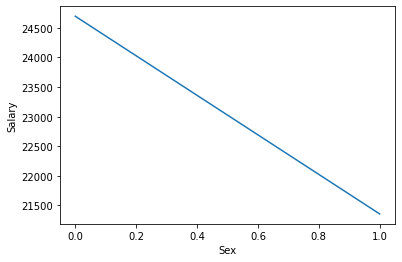

In [18]:
data.groupby("Sex")["Salary"].mean().plot()

#data.plot(x="Sex",y="Salary",style="s")
plt.xlabel("Sex")
plt.ylabel("Salary")
plt.show()

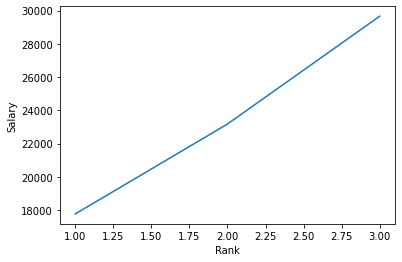

In [23]:
data.groupby("Rank")["Salary"].mean().plot()
plt.xlabel("Rank")
plt.ylabel("Salary")
# data.plot(x="Rank",y="Salary",style="o")
plt.show()

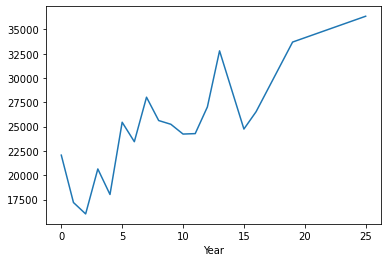

In [26]:
data.groupby("Year")["Salary"].mean().plot()
# data.plot(x="Year",y="Salary",style="o")
plt.show()

<AxesSubplot:xlabel='YSdeg'>

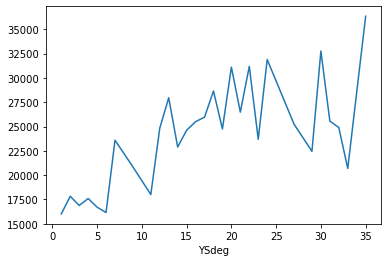

In [27]:
data.groupby("YSdeg")["Salary"].mean().plot()

In [28]:
data[["Sex","Salary"]].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


- negative correlation between sex and salary (inverse linear)

In [29]:
data[["Year","Salary"]].corr()

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


- there is positive linear relationship

In [30]:
data[["Rank","Salary"]].corr()

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [31]:
data[["YSdeg","Salary"]].corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [33]:
data[["Degree","Salary"]].corr()

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


- no linear relationship

In [34]:
X=data[["Sex","Rank","Year","YSdeg"]].values
y=data[["Salary"]].values

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [41]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train_scaled,y_train)


LinearRegression()

In [43]:
regression.predict(X_test_scaled)

array([[18095.68954683],
       [27835.15466996],
       [29658.97494842],
       [32760.18288742],
       [25329.60400687],
       [29664.39512508],
       [29140.02308049],
       [33120.79143816],
       [20127.01459913],
       [25329.60400687],
       [24597.90782482],
       [30641.73654791],
       [23937.61430912],
       [22299.79873422],
       [18423.21653454],
       [17494.85593198]])

In [45]:
regression.coef_

array([[ 718.8256736 , 4777.53022349, 2553.51306338, -868.29644224]])

In [47]:
regression.intercept_

array([23667.25])

In [48]:
# salary=718.82*Sex+4777.53*Rank+2553.51*Year-868*Ysdeg+23667.25

In [55]:
y_pred=regression.predict(X_test_scaled)

In [56]:
from sklearn import metrics
print("R2-score:",metrics.r2_score(y_test,y_pred))
print(regression.score(X_test_scaled,y_test))

R2-score: 0.8565609853914932
0.8565609853914932


R2 score is good the equation has good linear relationship